**Description**


Kmeans est une technique de Machine Learning qui est utilisée pour le regroupement des données (clustering) en groupes (clusters).

_Modèle:_

Le modèle de Kmeans est l'ensemble des centres des clusters.

_Hyperparamètre:_

Kmeans a un hyperparamètre appelé K qui représente le nombre de clusters.

_Apprentissage:_

L'algorithme d'apprentissage de Kmeans est non supervisé : il apprend avec des données non étiquetées. Cet algorithme essaie de trouver les centres des clusters optimales.

_Prédiction:_

Une fois l'apprentissage est fini, Kmeans permet de prédire pour un point donné à quel groupe il appartient.


**Données d'apprentissage**

Soit une population ds employés qu'on veut regrouper en clusters.

Créer une matrice des données d'employés X (comme étant des points de même dimension).

              X=[1100.67 31
                 3500.98 58
                 1300.58 35
                 3100.98 55
                 1200.77 32]


In [9]:
import numpy as np

employees= np.array([[1100.67,31],[3500.98,58],[1300.58,35],[3100.98,55],[1200.77,32]])

**Hyperparamètre**

Choisir le nombre des clusters K


In [10]:
#
k=2

**Modèle**


Initialiser les centres des clusters

Choisir d'une façon aléatoire K points des données comme centres des clusters.

Notes:

- Mettre les centres intiales dans une matrice M
- Utiliser la fonction random.choice()


In [16]:
# Randomly select k points from the dataset
import random

M = random.sample(employees.tolist(), k)
print(M)


[[3100.98, 55.0], [3500.98, 58.0]]


**Apprentissage**


L'algorithme est comme suit :

          Pour chaque t de 0 jusqu'à T-1 faire
            Pour chaque point p des données faire
              Pour chaque centre m_i des clusters M faire
                d=distance euclidienne(p,m_i)
                Ajouter d dans distances
              label de p = argmin(distances)
              Ajouter label à labels
            Pour chaque centre m_i des clusters faire
              c=moyenne arithmétique des points ayant label egale à i


Etape 1: Implémenter la fonction predire_label() qui prend un point p et qui retourne le label de cluster auquel p appartient.

        Pour chaque centre m_i des clusters M faire
            d=distance euclidienne(p,m_i)
            Ajouter d dans distances
        label de p = argmin(distances)

Notes:

- Utiliser M comme variable globale.
- Utiliser la fonction np.argmin()


In [12]:
def predict_label(p):
    distances = np.empty(k)
    for m in M:
        d= np.linalg.norm(p-m)
        distances = np.append(distances, d)
    return np.argmin(distances)


Etape 2: Définir la fonction determiner_labels() qui prend un ensemble des points X et qui retourne les labels de tous les points.

Cette fonction impélmente la partie de l'algorithme d'apprentissage suivante:

          Pour chaque point p des données faire
              Pour chaque centre m_i des clusters M faire
                d=distance euclidienne(p,m_i)
                Ajouter d dans distances
              label de p = argmin(distances)
              Ajouter label à labels

Note:

- Un label designe l'indice de groupe auquel apparetient un point.
- Utiliser la fonction predire_label()
- Utiliser M comme variable globale.


In [17]:
def determine_labels(X):
    labels = np.empty(X.shape[0])
    for x in X:
        labed=predict_label(x)
        labels = np.append(labels, labed)
    return labels
        
        

Etape 3: Définir une fonction mettre_a_jour_centres() qui prend les points et leurs labels d'appartenance aux clusters.

          Pour chaque centre m_i des clusters faire
              m_i=moyenne arithmétique des points ayant label egale à i

Note:

- Utiliser np.mean()


In [32]:
def update_centroids(X, labels):
    for m in M:
        m = np.mean(X[labels==m], axis=0)

Etape 4:

Définir la fonction fit() qui implémente tout l'algorithme d'apprentissage. Elle prend l'ensemble des points X et elle met à jour M (les centres des clusters).

Notes:

- Utiliser M comme une variable globale.
- Utiliser les fonctions determiner_labels() et les fonctions mettre_a_jour()


In [22]:
def fit(X):
    for t in range(10):
        labels = determine_labels(X)
        update_centroids(X, labels)
    
    

**Prédiction**

Définir une fonction predict() qui prend une matrice des points d'employés X. Elle retourne les labels de ces points.

Note:

- Utiliser la fonction predire_label
- Utiliser M comme variable globale.


In [23]:
def predict(X):
    result = np.empty(X.shape[0])
    for x in X:
        result = np.append(result, predict_label(x))
    return result


**Recap**

Nous allons définir Kmeans sous la forme d'une classe que vous appelez Kmeans.

Elle contient les fonctions suivantes:

- un constructeur dans lequel:
  - L'hyperparamètre K est considéré comme attribut d'objet. Il permet de l'initialiser.
  - Le modèle M (les centres de clusters) est initialisé aléatoirement
- la fonction fit() définie ci-dessus
- la fonction predict() définie ci-dessus


In [61]:
class Kmeans:
    import numpy as np
    import random

    def __init__(self,k,iters=10):
        self.k = k
        self.iters = iters

    def predict_label(self,p):
        distances = []
        for m in self.M:
            d= np.linalg.norm(p-m)
            distances = np.append(distances, d)
        return np.argmin(distances)

    def determine_labels(self,X):
        labels = []
        for x in X:
            label=self.predict_label(x)
            labels = np.append(labels, label)
        return labels

    def update_centroids(self,X, labels):
        for i,m in enumerate(self.M):
            self.M[i] = np.mean(X[labels==i], axis=0)
    def fit(self,X):
        import random
        self.M = random.sample(X.tolist(), self.k)
        for t in range(10):
            labels = self.determine_labels(X)
            self.update_centroids(X, labels)

    def predict(self,X):
        result = []
        for x in X:
            result = np.append(result, self.predict_label(x))
        return result

    

In [62]:
import numpy as np

employees= np.array([[1100.67,31],[3500.98,58],[1300.58,35],[3100.98,55],[1200.77,32]])

In [63]:
km=Kmeans(2)

In [64]:
km.fit(employees)

In [67]:
km.predict([[3000,55],[1100,31]])

array([1., 0.])

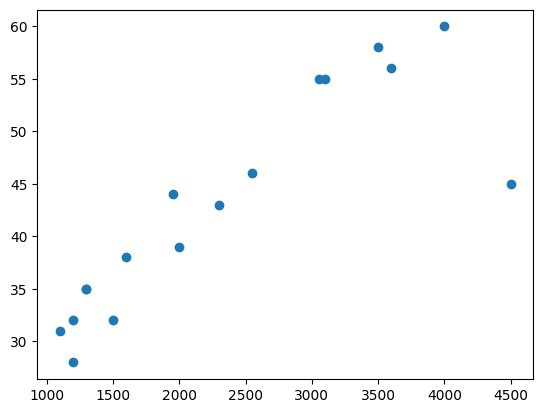

In [84]:
# example of k-means clustering
# test data consisting of 2 clusters of senior and junior employees with their salaries and ages 
# we want to cluster them into 2 groups based on their salaries and ages
test_data = np.array([[1600,38],[1950,44],[2000,39],[2300,43],[2550,46],[4500,45],[1200.89,28],[3600,56],[1500.58,32],[3050.66,55],[1300.77,35],[4000,60], [1100.67,31],[3500.98,58],[1300.58,35],[3100.98,55],[1200.77,32]])
# visualizing the data
import matplotlib.pyplot as plt
plt.scatter(test_data[:,0], test_data[:,1])
plt.show()


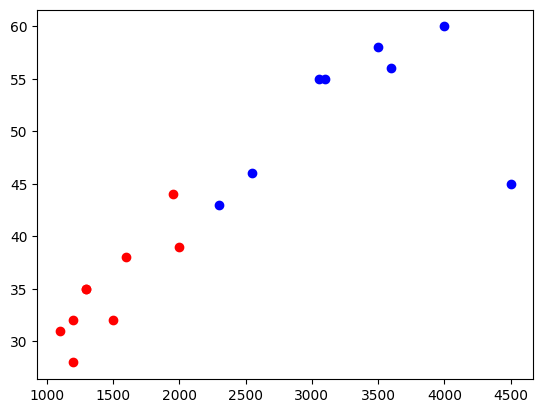

In [85]:
# k-means clustering
k =2
clusters=km.predict(test_data)
#show first cluster with red and second with blue
plt.scatter(test_data[clusters==0,0], test_data[clusters==0,1], c='red')
plt.scatter(test_data[clusters==1,0], test_data[clusters==1,1], c='blue')

